
# Data Science Jobs in Australia

#### Emerson L. Machado
https://www.linkedin.com/in/ema00<br/>
https://github.com/emada

### About
I developed this small project during my studies at the [Data Science Imersive course at General Assembly Sydney](https://generalassemb.ly/education/data-science-immersive?where=sydney). My main motivation was to get a job in Australia! Simply as that :)

Two questions came to my mind when I thought how I would do this:
1. Where in Australia is data science hot?
2. What are the most desired skills in the industry?

I couldn't find anything easily and reliable and thus I decided to do my own **research**. I also wanted to have some fun and code it myself after I got inspired by the following [work](https://jessesw.com/Data-Science-Skills) :)

In the following sections I present how I complete this project. I gave it a formal structure, but I tried my best not to be too academic.      :) :) :)


### Methodology

Basically, the method I used to answer my research questions was to get some job posts and extracted from them the information I needed. An API would be the best thing ever. As I wasn't willing to pay for this data, I decided to scrape it from a job posting site.

I found many job sites in Australia. As I didn't have any a priori information about them I just picked [CareerOne](https://www.careerone.com.au/).

Next step was to choose a query to filter the job listings. Well... I just used *data science*.

The programming language to develop was a straight **Python**. I'm brushing my code skills in this language and thus this was a good opportunity.

### Code

The code can be found at https://github.com/emada/ds_jobs_australia. It is too long to include in this notebook (almost 500 lines). Thus I only include in this notebook the code to render the plots.

If you want to run the code in your machine make sure to remove the data files in the data folder. This will force them to be recreated.

One more thing, I hided all codes in this notebook. If you want to view it you can click the button 'Show Code' below.

In [61]:
from IPython.display import HTML
hide_code_script = '''
    <script>
      function code_toggle() {
        if (code_shown){
          $('div.input').hide('500');
          $('#toggleButton').val('Show Code')
        } else {
          $('div.input').show('500');
          $('#toggleButton').val('Hide Code')
        }
        code_shown = !code_shown
      }

      $( document ).ready(function(){
        code_shown=false;
        $('div.input').hide()
      });
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
'''
HTML(hide_code_script)

### Results

At the time I ran the code to fetch the job listings (March 30th, 2017) there were 168 ads for the 'data science' query. I stored all their scraped info inside the file 'data/scraped_data.p'.

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sys
import pandas as pd
sys.path.append("code")
from position import *

scraped_data_file = 'data/scraped_data.p'
[positions, skills, job_titles, df] = pickle.load(open(scraped_data_file, 'rb'))
num_positions = len(positions)

First thing to check is the job distribution per date there are some pretty old job ads, almost an year old! As you can see below, most of the jobs are from the begining of 2017.

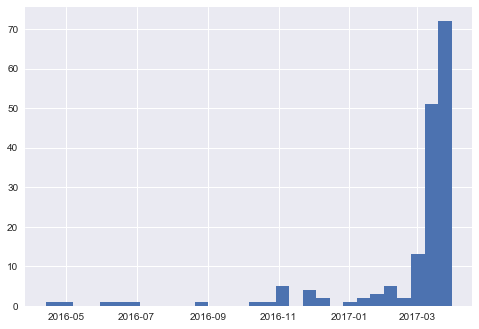

In [63]:
dates = [p.get_date() for p in positions]
plt.hist(dates, bins=30)  
plt.show()

Now answering my first question (where is data science hot in Australia?)

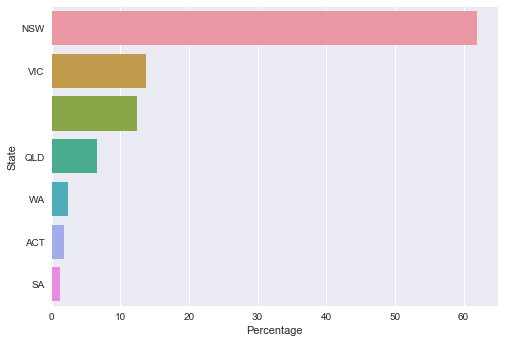

In [64]:
column_name = 'State'
serie = df.groupby(column_name).size()
serie = serie.sort_values(ascending=False)
serie = serie / float(num_positions) * 100
df_dist = pd.DataFrame({'count' : serie}).reset_index()

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(
  data=df_dist, 
  y=column_name, 
  x='count'
)
ax.set(
  xlabel='Percentage',
  ylabel=column_name
)

plt.show()


No doubt New South Wales is the big data science player in Australia. I bet Sydney is the honey pot :)

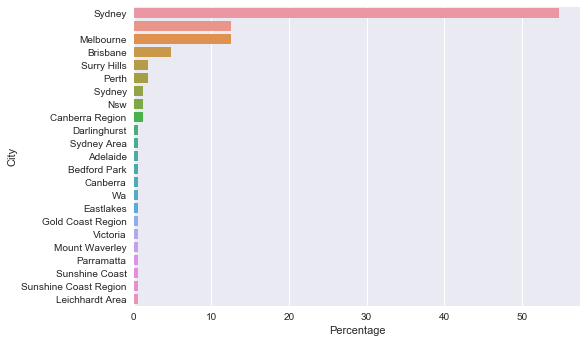

In [65]:
column_name = 'City'
serie = df.groupby(column_name).size()
serie = serie.sort_values(ascending=False)
serie = serie / float(num_positions) * 100
df_dist = pd.DataFrame({'count' : serie}).reset_index()

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = sns.barplot(
  data=df_dist, 
  y=column_name, 
  x='count'
)
ax.set(
  xlabel='Percentage',
  ylabel=column_name
)

plt.show()

Sydney alone has more job ads than the remaining cities in Australia. Definitely this is the place to invest in networking.

Now answering my last question. What skills should I invest more effort?

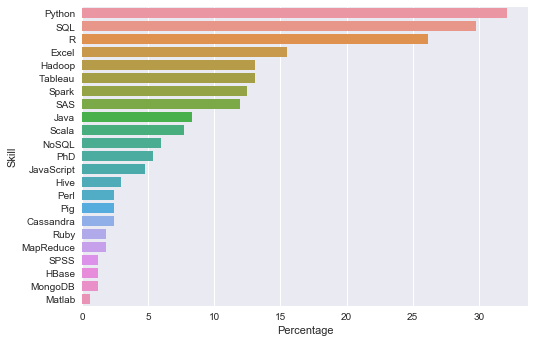

In [66]:
ax = sns.barplot(
  data=skills, 
  x='percentage', 
  y='skill'
)
ax.set(
  xlabel='Percentage',
  ylabel='Skill'
)
plt.show()

Python, SQL and R seems to be the most desired/required skills in the collected job ads. Feels good to have a bit of these skills. :)